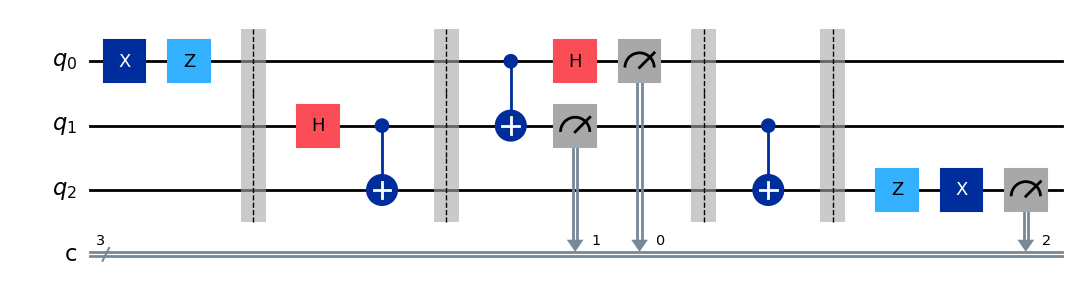

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

# Registradores quântico e clássico
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Definindo um circuito quântico com 3 qubits e 3 bits clássicos
qc = QuantumCircuit(q, c)

# Operações quânticas ao circuito
qc.x(0)
qc.z(0)
qc.barrier()

qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.measure(0, c[0])  # Medição do qubit 0 no bit clássico 0
qc.measure(1, c[1])  # Medição do qubit 1 no bit clássico 1
qc.barrier()

qc.cx(1, 2)
qc.barrier()

qc.z(2)
qc.x(2)
qc.measure(2, c[2])  # Medição do qubit 2 no bit clássico 2

# Desenha o circuito
qc.draw(output='mpl')


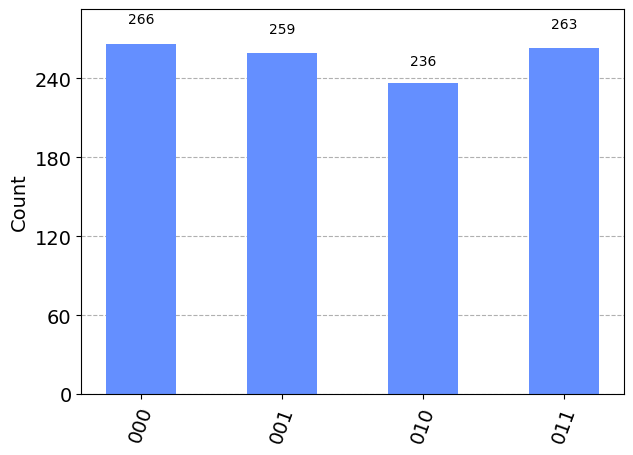

In [5]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Inicializar o provedor IBM
provider = IBMProvider() 
backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

qc = QuantumCircuit(q, c)

qc.x(0)
qc.z(0)
qc.barrier()

qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.measure(0, c[0])
qc.measure(1, c[1])
qc.barrier()

qc.cx(1, 2)
qc.barrier()

qc.z(2)
qc.x(2)
qc.measure(2, c[2])

# Transpor o circuito para o backend 
transpiled_circuit = transpile(qc, backend)

job = backend.run(transpiled_circuit, shots=1024)
result = job.result()  

counts = result.get_counts(transpiled_circuit)

plot_histogram(counts)
